In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
# plt.style.use('ggplot')

dudzele = pd.read_csv('DUD10.tsv', sep='\t')
nieuwpoort = pd.read_csv('NIEU10.tsv', sep='\t')


scaffolds = dudzele['scaffold'].unique()
scaffolds

,scaffold,region,coverage,window_length,position,chromosome,chromLengths,chromStarts,chromEnds,chromMid,genomic_position,individual,population,normalized_coverage
0,scaffold_01,1,0.331214,100000.0,100000.0,1,122030211,1,122030211,61015105.5,100000.0,GC129388,Dudzele,0.024729
1,scaffold_01,2,0.292071,100000.0,200000.0,1,122030211,1,122030211,61015105.5,200000.0,GC129388,Dudzele,0.021806
2,scaffold_01,3,0.430579,100000.0,300000.0,1,122030211,1,122030211,61015105.5,300000.0,GC129388,Dudzele,0.032147
3,scaffold_01,4,7.363500,100000.0,400000.0,1,122030211,1,122030211,61015105.5,400000.0,GC129388,Dudzele,0.549765
4,scaffold_01,5,17.006300,100000.0,500000.0,1,122030211,1,122030211,61015105.5,500000.0,GC129388,Dudzele,1.269704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,scaffold_10,195,0.423193,100000.0,19500000.0,10,23453803,549277660,572731462,561004560.5,568777659.0,GC129395,Nieuwpoort,0.051238
10700,scaffold_10,196,0.771084,100000.0,19600000.0,10,23453803,549277660,572731462,561004560.5,568877659.0,GC129395,Nieuwpoort,0.093358
10701,scaffold_10,197,0.106928,100000.0,19700000.0,10,23453803,549277660,572731462,561004560.5,568977659.0,GC129395,Nieuwpoort,0.012946
10702,scaffold_10,198,1.375000,100000.0,19800000.0,10,23453803,549277660,572731462,561004560.5,569077659.0,GC129395,Nieuwpoort,0.166477


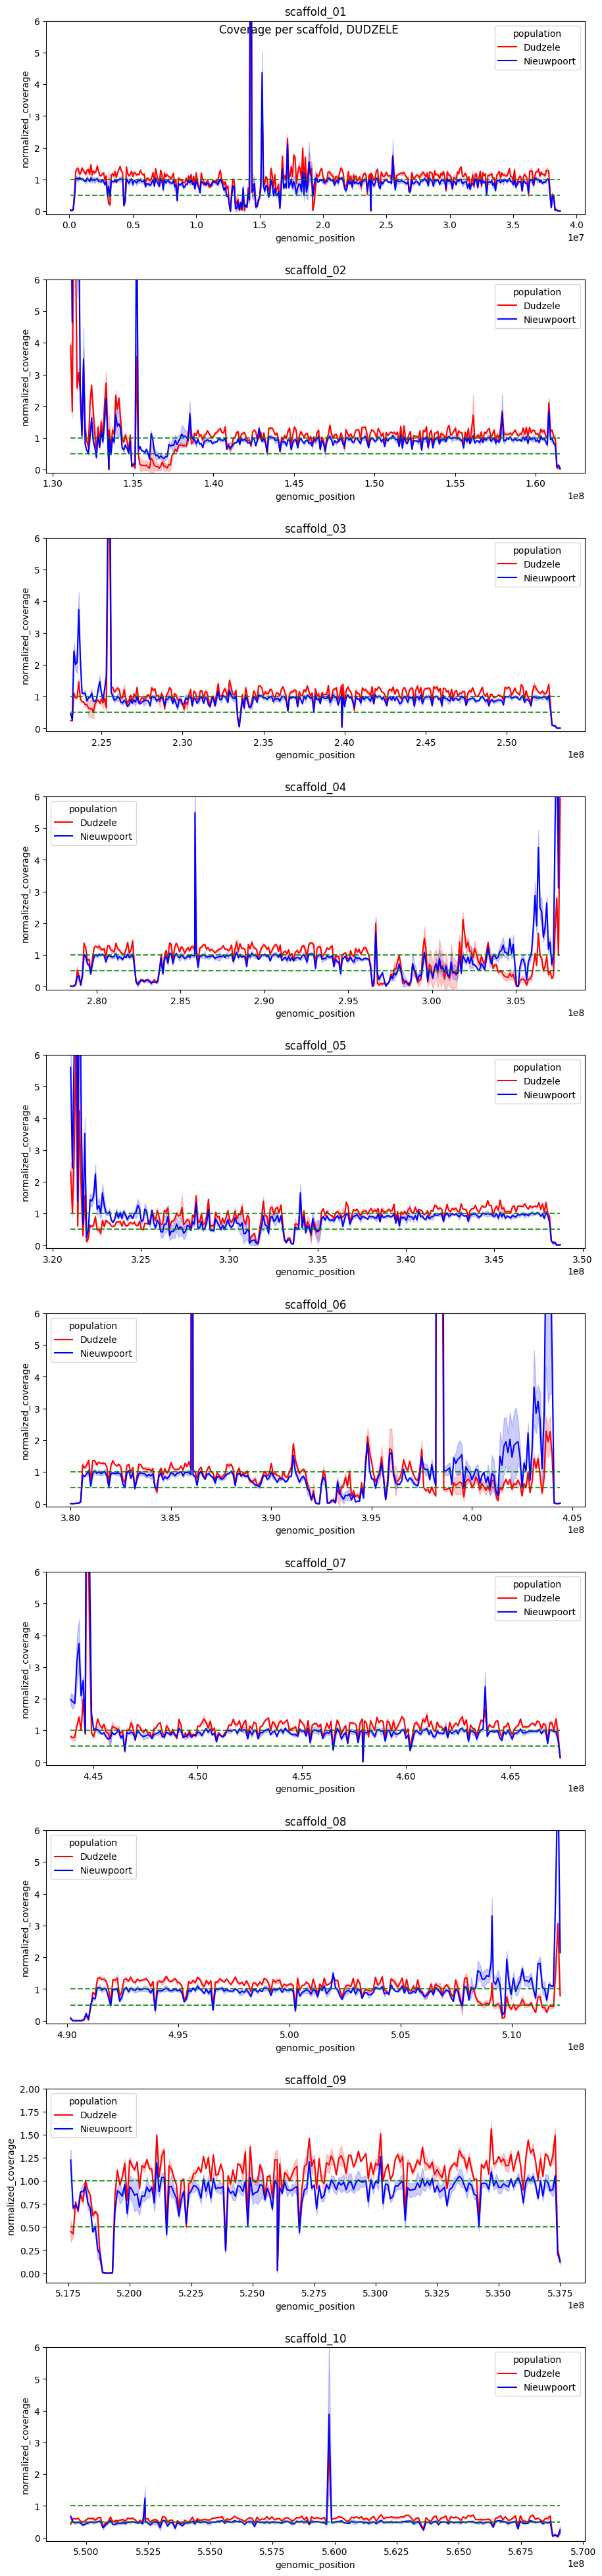

In [37]:
flatui = ["red", "blue"]
sns.set_palette(flatui)

figs, axs = plt.subplots(10, 1, figsize=(10, 40))
figs.tight_layout(pad=5) 
figs.suptitle('Coverage per scaffold, DUDZELE')

act_scaffold = 0
for i in range(10):
    dud_now = dudzele[dudzele['scaffold'] == scaffolds[act_scaffold]] # dudzele scaffold en esta iteracion
    sns.lineplot(ax=axs[i], data=dud_now, x='genomic_position', y='normalized_coverage', hue='population', errorbar=('sd'))
    axs[i].hlines(1, min(dud_now['genomic_position']), max(dud_now['genomic_position']), color='g',alpha=0.8,linestyles='dashed')
    axs[i].hlines(0.5, min(dud_now['genomic_position']), max(dud_now['genomic_position']), color='g',alpha=0.8,linestyles='dashed')
    axs[i].set_title(f'{scaffolds[act_scaffold]}')
    axs[i].set_ylim([-0.1, 6])
    if i == 8:
        axs[i].set_ylim([-0.1, 2])
    act_scaffold += 1

plt.savefig('dudzele_coverage_per_scaffold.pdf')
plt.show()


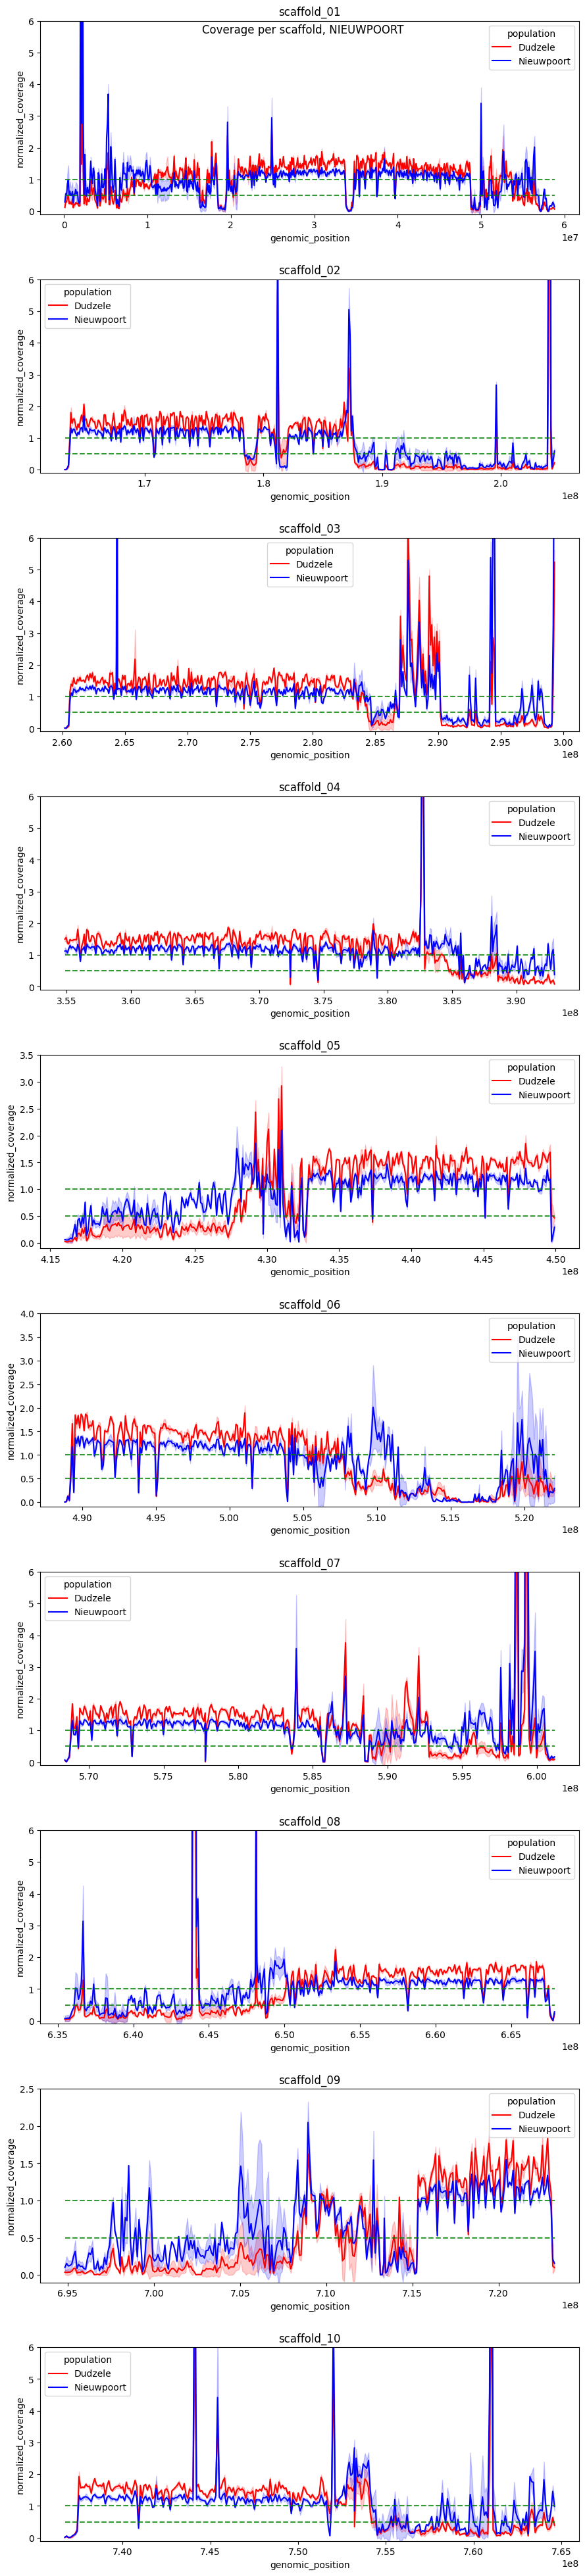

In [35]:
flatui = ["red", "blue"]
sns.set_palette(flatui)

figs, axs = plt.subplots(10, 1, figsize=(10, 40))
figs.tight_layout(pad=5) 
figs.suptitle('Coverage per scaffold, NIEUWPOORT')

act_scaffold = 0
for i in range(10):
    nieu_now = nieuwpoort[nieuwpoort['scaffold'] == scaffolds[act_scaffold]] # nieuwpoort scaffold en esta iteracion
    sns.lineplot(ax=axs[i], data=nieu_now, x='genomic_position', y='normalized_coverage', hue='population', errorbar=('sd'))
    axs[i].hlines(1, min(nieu_now['genomic_position']), max(nieu_now['genomic_position']), color='g',alpha=0.8,linestyles='dashed')
    axs[i].hlines(0.5, min(nieu_now['genomic_position']), max(nieu_now['genomic_position']), color='g',alpha=0.8,linestyles='dashed')
    axs[i].set_title(f'{scaffolds[act_scaffold]}')
    axs[i].set_ylim([-0.1, 6])
    if i == 8: #scaffold 9
        axs[i].set_ylim([-0.1, 2.5])
    if i == 4: #scaffold 5
        axs[i].set_ylim([-0.1, 3.5])
    if i == 5: #scaffold 6
        axs[i].set_ylim([-0.1, 4])
    act_scaffold += 1

plt.savefig('nieuwpoort_coverage_per_scaffold.pdf')
plt.show()

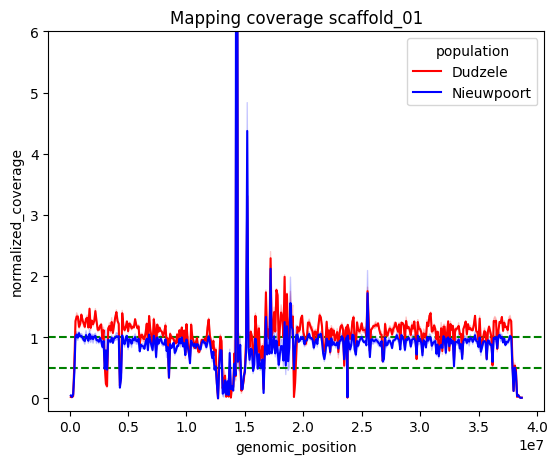

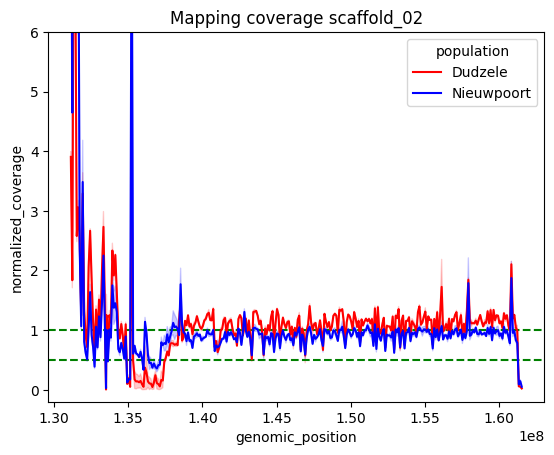

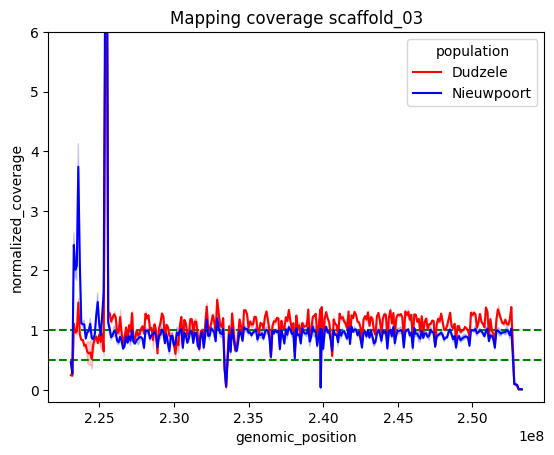

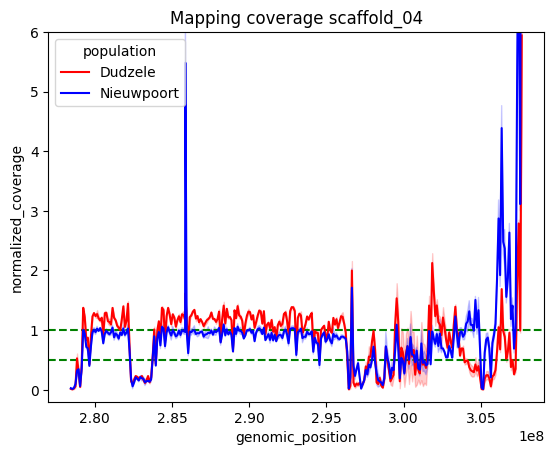

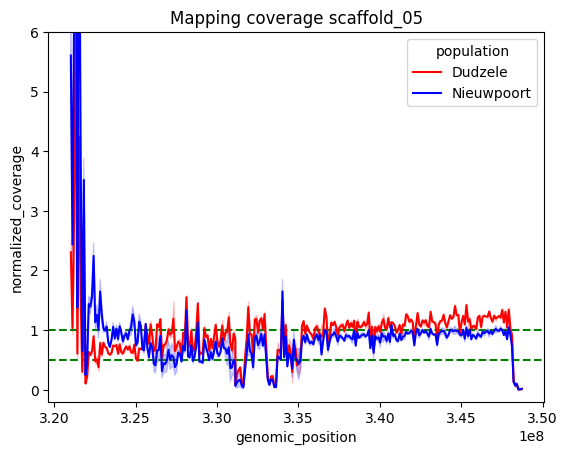

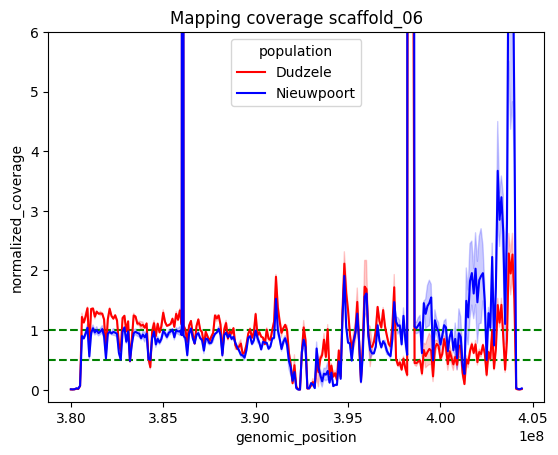

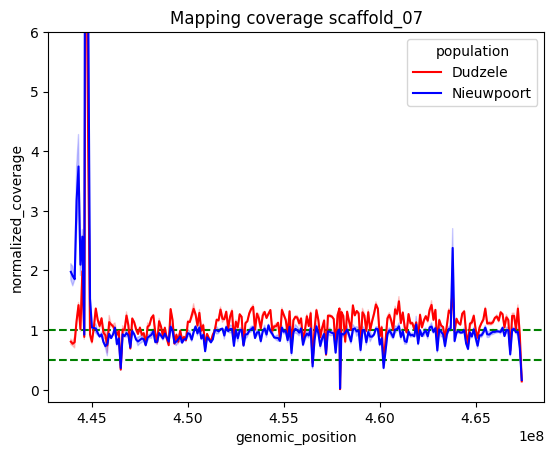

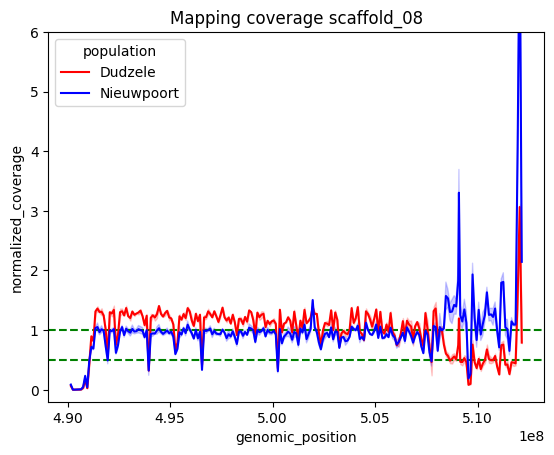

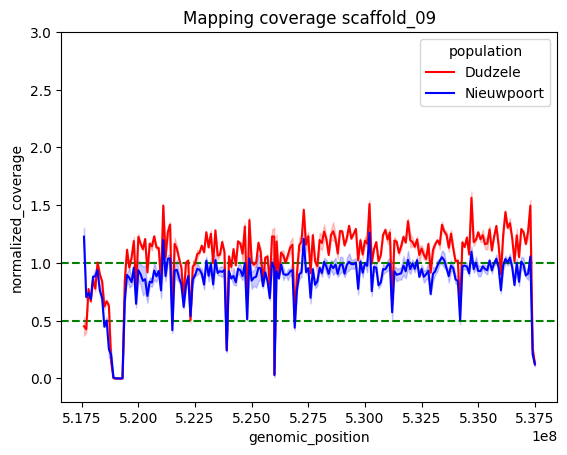

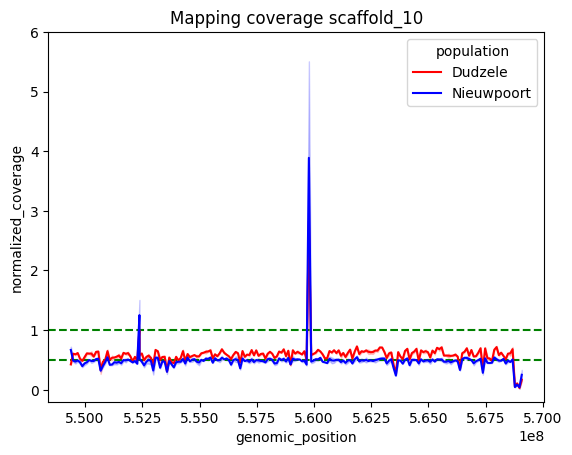

In [6]:
# Single figures, mapped against Dudzele primary genome

flatui = ["red", "blue"]
sns.set_palette(flatui)

plt.tight_layout(pad=5) 
plt.subplots_adjust(top=0.9)


act_scaffold = 0
for i in range(10):
    plt.axhline(y=1, color='g',linestyle='--',alpha=0.5)
    plt.axhline(y=0.5, color='g',linestyle='--',alpha=0.5)
    sns.lineplot(data=dudzele[dudzele['scaffold'] == scaffolds[act_scaffold]], x='genomic_position', y='normalized_coverage', hue='population', errorbar=('ci', 95))
    plt.title(f'Mapping coverage {scaffolds[act_scaffold]}')
    plt.ylim([-0.2, 6])
    if act_scaffold == 8:
        plt.ylim([-0.2, 3])
    plt.savefig(f'coverage-figures/dudzele_coverage_{scaffolds[act_scaffold]}.pdf')
    act_scaffold += 1
    plt.show()




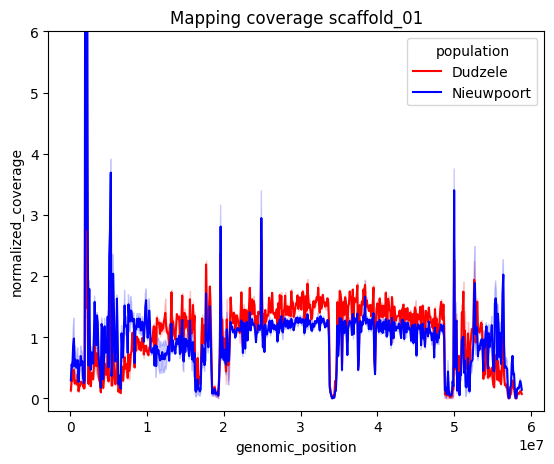

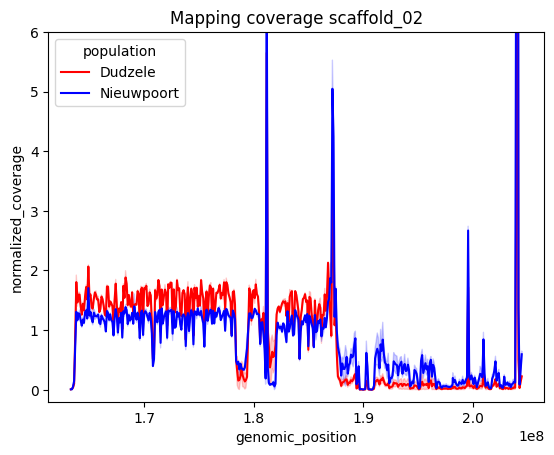

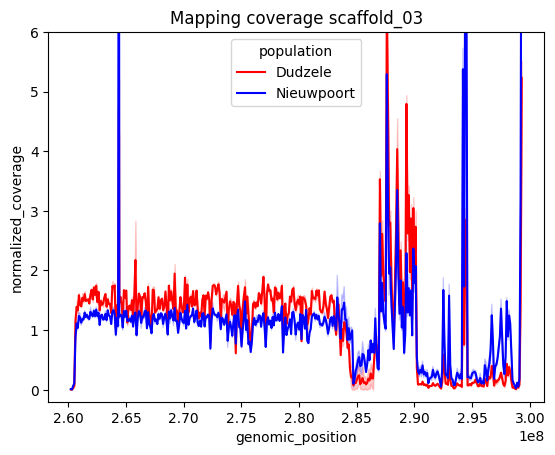

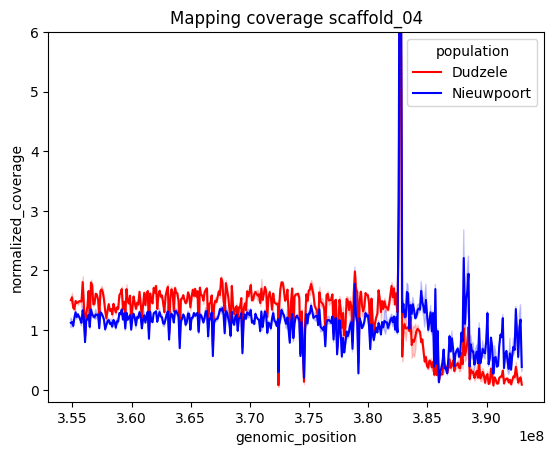

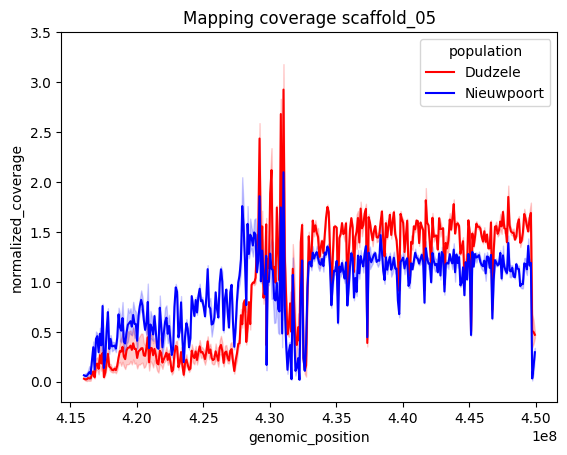

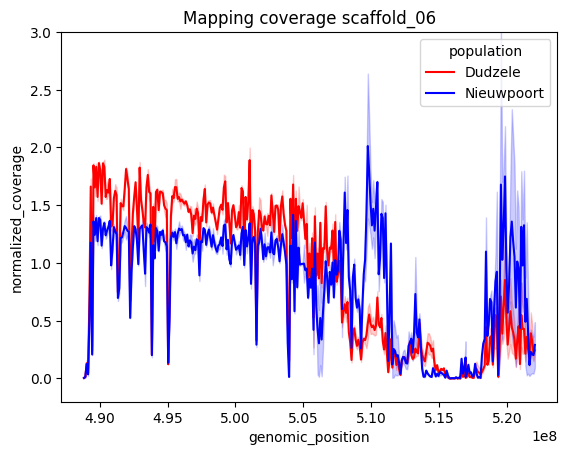

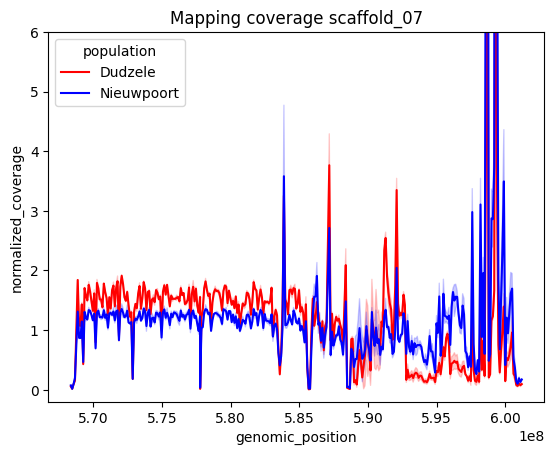

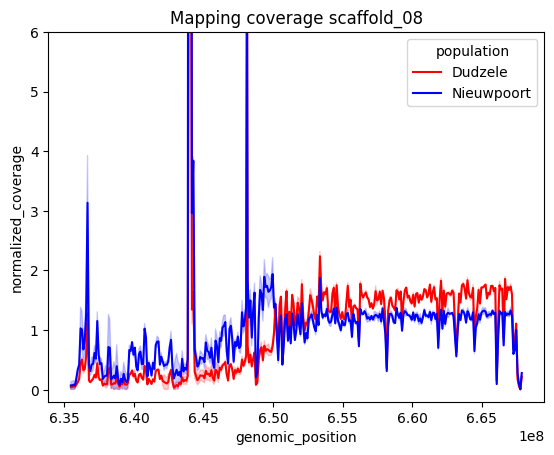

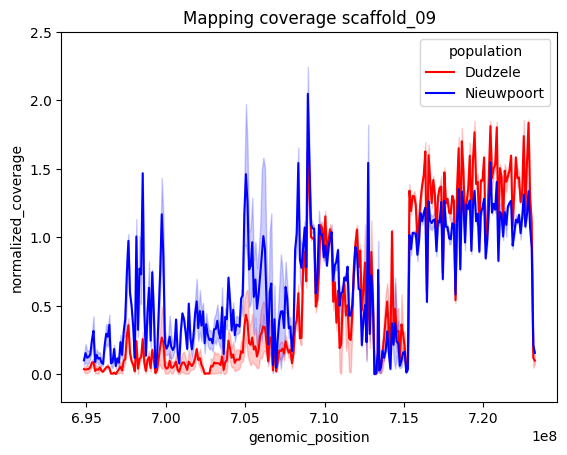

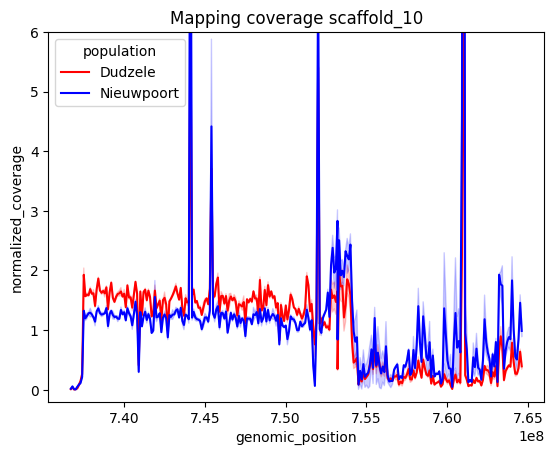

In [13]:
# Single figures, mapped against Nieuwpoort primary genome

flatui = ["red", "blue"]
sns.set_palette(flatui)

plt.tight_layout(pad=5) 
plt.subplots_adjust(top=0.9)


act_scaffold = 0
for i in range(10):
    sns.lineplot(data=nieuwpoort[nieuwpoort['scaffold'] == scaffolds[act_scaffold]], x='genomic_position', y='normalized_coverage', hue='population', errorbar=('ci', 95))
    plt.title(f'Mapping coverage {scaffolds[act_scaffold]}')
    plt.ylim([-0.2, 6])
    if act_scaffold == 8:
        plt.ylim([-0.2, 2.5])
    if act_scaffold == 5:
        plt.ylim([-0.2, 3])
    if act_scaffold == 4:
        plt.ylim([-0.2, 3.5])
    plt.savefig(f'coverage-figures/nieuwpoort_coverage_{scaffolds[act_scaffold]}.pdf')
    act_scaffold += 1
    plt.show()
